In [50]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

In [51]:
flights = pd.read_csv('../output/flight_summary.csv.gz', compression='gzip', sep='|')

In [52]:
flights.head()

,year,R-T,pickup_airport,dropoff_airport,passengers,flights
0,2010,R,KAEX,KHRL,788,10
1,2010,R,KAEX,KLRD,27,2
2,2010,R,KAEX,MDSD,549,6
3,2010,R,KAEX,MGGT,1441,13
4,2010,R,KAEX,MHLM,454,5


In [53]:
flights['pickup_airport'] = flights['pickup_airport'].str.upper()
flights['dropoff_airport'] = flights['dropoff_airport'].str.upper()

In [54]:
flights_loc = set(pd.concat([flights['pickup_airport'], flights['dropoff_airport']]))

In [55]:
# McChord Air Force Base not in list of pickup or dropoff airports
'KTCM' in flights_loc

False

In [56]:
bad_airports = ['KKBL']

In [57]:
flights = flights[~flights['pickup_airport'].isin(bad_airports)]
flights = flights[~flights['dropoff_airport'].isin(bad_airports)]

In [58]:
airports = pd.read_csv('../../share/hand/GlobalAirportDatabase.csv.gz', compression='gzip', sep='|')

In [59]:
airports.head()

,ICAOCode,IATACode,AirportName,City,Country,LatitudeDegrees,LatitudeMinutes,LatitudeSeconds,LatitudeDirection,LongitudeDegrees,LongitudeMinutes,LongitudeSeconds,LongitudeDirection,Altitude,LatitudeDecimalDegrees,LongitudeDecimalDegrees
0,AYGA,GKA,GOROKA,GOROKA,PAPUA NEW GUINEA,6,4,54,S,145,23,30,E,1610,-6.082,145.392
1,AYLA,LAE,NaN,LAE,PAPUA NEW GUINEA,0,0,0,U,0,0,0,U,0,0.000,0.000
2,AYMD,MAG,MADANG,MADANG,PAPUA NEW GUINEA,5,12,25,S,145,47,19,E,7,-5.207,145.789
3,AYMH,HGU,MOUNT HAGEN,MOUNT HAGEN,PAPUA NEW GUINEA,5,49,34,S,144,17,46,E,1643,-5.826,144.296
4,AYNZ,LAE,NADZAB,NADZAB,PAPUA NEW GUINEA,6,34,11,S,146,43,34,E,73,-6.570,146.726


In [60]:
airports_loc = set(airports['ICAOCode'])

In [61]:
airports.set_index('ICAOCode', inplace=True)

In [62]:
additional_airports = pd.read_csv('../../share/hand/locations.csv', quotechar='"')

In [63]:
additional_airports.columns = ['ICAOCode', 'CountryISO', 'State', 'City', 'LatitudeDecimalDegrees', 'LongitudeDecimalDegrees']
additional_airports.set_index('ICAOCode', inplace=True)
additional_airports.head()

,CountryISO,State,City,LatitudeDecimalDegrees,LongitudeDecimalDegrees
ICAOCode,,,,,
BKPR,KS,Pristina,Slatina,42.572778,21.035833
EYVI,LT,Vilnius,Vilnius,54.636944,25.287778
FKYS,CM,Nsimalen,Nsimalen,3.722500,11.553333
FYWH,NaN,Windhoek,Windhoek,-22.486667,17.462500
GQNO,MR,Nouakchott,Nouakchott,18.310000,-15.969722


In [64]:
missing_airports = list(flights_loc.difference(airports_loc))

In [65]:
missing_airports

['RJBB',
 'KGYY',
 'KTOL',
 'HKJK',
 'GQNO',
 'KNYL',
 'BKPR',
 'TXKF',
 'KYKM',
 'EYVI',
 'KSDM',
 'FKYS',
 'SAEZ',
 'SPJC',
 'VGHS',
 'KMWA',
 'OYSN',
 'GUCY',
 'KPSM',
 'SYCJ',
 'MHSC',
 'KCSG',
 'GVNP',
 'KTWF',
 'OMDW',
 'KRFD',
 'KKBL',
 'KIWA',
 'UGTB',
 'FYWH',
 'ORBI',
 'KLAW']

In [66]:
airports_2 = additional_airports[additional_airports.index.isin(missing_airports)].copy()

In [67]:
airports_2.head()

,CountryISO,State,City,LatitudeDecimalDegrees,LongitudeDecimalDegrees
ICAOCode,,,,,
BKPR,KS,Pristina,Slatina,42.572778,21.035833
EYVI,LT,Vilnius,Vilnius,54.636944,25.287778
FKYS,CM,Nsimalen,Nsimalen,3.722500,11.553333
FYWH,NaN,Windhoek,Windhoek,-22.486667,17.462500
GQNO,MR,Nouakchott,Nouakchott,18.310000,-15.969722


In [68]:
airports_2 = airports_2[['LatitudeDecimalDegrees', 'LongitudeDecimalDegrees']]

In [69]:
airports = pd.concat([airports, airports_2])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [70]:
flights

,year,R-T,pickup_airport,dropoff_airport,passengers,flights
0,2010,R,KAEX,KHRL,788,10
1,2010,R,KAEX,KLRD,27,2
2,2010,R,KAEX,MDSD,549,6
3,2010,R,KAEX,MGGT,1441,13
4,2010,R,KAEX,MHLM,454,5
5,2010,R,KAEX,MHTG,756,8
6,2010,R,KAEX,MKJP,201,3
7,2010,R,KAEX,MSLP,438,5
8,2010,R,KAEX,SEGU,343,6
9,2010,R,KAEX,SKBO,244,3


In [71]:
edges = flights[['pickup_airport', 'dropoff_airport']].values

In [72]:
g = nx.from_edgelist(edges)

In [73]:
len(g.nodes()), len(g.edges())

(223, 723)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


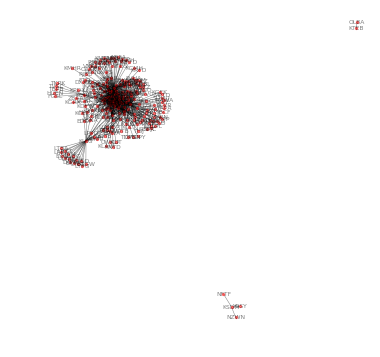

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

In [75]:
sg = next(nx.connected_component_subgraphs(g))

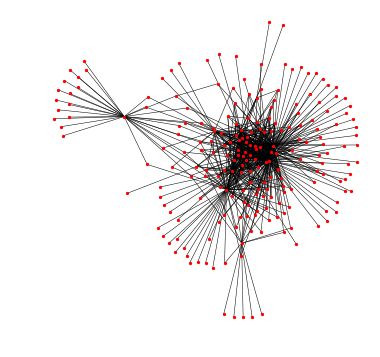

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()

In [77]:
pos = {airport: (v['LongitudeDecimalDegrees'], v['LatitudeDecimalDegrees'])
       for airport, v in
       airports.to_dict('index').items()}

In [78]:
deg = nx.degree(sg)
sizes = [5 * deg[icao] for icao in sg.nodes]

In [79]:
# altitude = airports_us['alt']
# altitude = [altitude[icao] for icao in sg.nodes]

In [80]:
labels = {icao: icao if deg[icao] >= 20 else ''
          for icao in sg.nodes}

/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


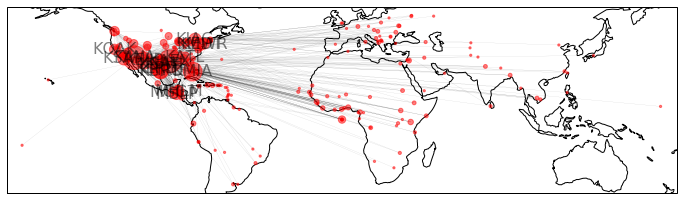

In [81]:
# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(12, 8),
    subplot_kw=dict(projection=crs))
ax.coastlines()
# Extent of continental US.
# ax.set_extent([-128, -62, 10, 50])
nx.draw_networkx(sg, ax=ax,
                 font_size=16,
                 alpha=.5,
                 width=.075,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 cmap=plt.cm.autumn)